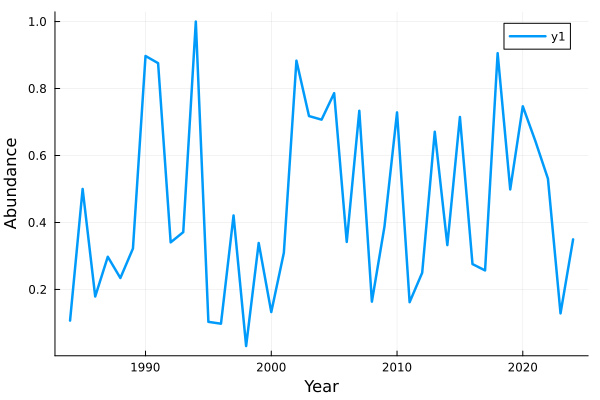

In [1]:
using CSV, DataFrames, Plots
dat = CSV.read("../processed_data/dat_point2.csv",DataFrame)[:,:2:end]
Plots.plot(dat.year, dat.lat_34_40, width = 2.5, xlabel = "Year", ylabel = "Abundance")

In [2]:
dat[1:4,:]

Row,year,lat_34_40,lat_34_60,lat_35_00,lat_35_20,lat_35_40,lat_35_60,lat_35_80,lat_36_00,lat_36_20,lat_36_40,lat_36_60,lat_36_80,lat_37_00,lat_37_40,lat_37_80
,Int64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,1984,0.107015,0.0,0.141227,0.00584336,0.043602,0.240964,0.195319,0.181572,0.273573,0.536212,0.301998,0.231356,0.013519,0.0,0.191528
2,1985,0.500143,0.0,0.459782,0.227553,0.591732,1.0,0.938183,0.963914,1.0,1.0,0.318084,0.413675,0.0479255,0.0,0.0
3,1986,0.178952,0.0,0.460811,0.0844647,0.221717,0.267623,0.354122,0.345321,0.623716,0.548119,0.154372,0.242309,0.0176829,0.0,0.149247
4,1987,0.297591,0.0054316,0.544364,0.200184,0.470391,0.653239,0.469947,0.491317,0.514035,0.719182,0.323051,0.383658,0.0503953,0.0,0.100726


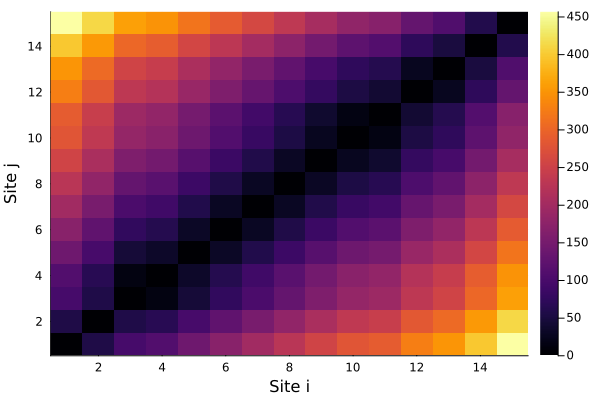

In [3]:
dists = CSV.read("../processed_data/dists_point2.csv",DataFrame)[:,:2:end]
Plots.heatmap(Matrix(dists), xlabel = "Site i", ylabel = "Site j")

In [4]:
X = CSV.read("../processed_data/covars.csv",DataFrame)[:,:2:end]
X[1:4,:]

Row,year,variable,value
,Float64,String7,Float64
1,1980.0,enso,0.33
2,1980.08,enso,0.2
3,1980.17,enso,0.39
4,1980.25,enso,0.51


In [5]:
unique(X.variable)

2-element Vector{String7}:
 "enso"
 "anom"

In [21]:
using UniversalDiffEq
include("../src/UDE.jl")

init_null_model (generic function with 1 method)

In [22]:
model,NN = init_model(dat,X,Matrix(dists),inv_squared_distance,[1,3],[];hidden = 10)
nothing

In [ ]:
train!(model, loss_function = "conditional likelihood", regularization_weight = 10^3.0)

In [32]:
using JLD2
function save_parameters(model,path)
    save_object(path, model.parameters ) 
end 
model_name = "model_1"
save_parameters(model,string("../results/parameters/",model_name,".jld"))


In [ ]:
# Run cross validation 
training_routine = model -> training!(model,regularization_weight_, process_errors_)
cv_dir = string("../results/cv/",model_name,"_",process_errors,"_",regularization_weight,".csv")
leave_future_out(model,training_routine,15,path=cv_dir)